# Gamma Exposure (GEX) Analysis For Bitcoin Option Markets

The following below is an approach to replicate the GEX measure for Bitcoin option markets. This research project was inspired by [Squeeze Metric's GEX paper](https://squeezemetrics.com/download/white_paper.pdf). Also, Hari Krishnan, a veteran global macro hedge-fund manager, shared very interesting thoughts in a RealVision TV interview on how dealer positioning can cause exaggerated moves. You can watch the interview [here](https://www.realvision.com/market-makers-and-coronavirus-the-mechanics-of-a-market-sell-off).


### Overview
Market-makers generally do not like to have exposure to the price of the underlying as their business is focused on collecting the bid-ask spread. As a result, in order to stay in business, option market-makers must hedge their delta exposures when buying or selling options. Recall gamma is the change in delta for a change in the spot price. If we are able to determine the aggregate gamma position for market-makers across all options, we can determine when they will need to delta-hedge and evaluate their impact on the market.

Let us consider a few examples adapted from the original GEX paper. In each example we will assume that a trader will be buying or selling options from a market-maker. Also note that being long an option (both call and put) will result in a positive gamma position and vice-versa.

#### The following two examples are when the market-maker is long gamma

###### Ex. 1 - Trader Short Call Option and Market-Maker Long Call Option

- A trader sells a BTC call option which has a delta of 0.40
- The trader has a delta exposure of -0.40: if BTC goes up by 1% then the call option price will go down by 0.40%
- The market-maker is long the call option and has a delta exposure of +0.40 to this option
- The market-maker would initially delta-hedge by selling 0.40 BTC in spot/futures markets to remain delta-neutral

Now suppose BTC were to fall in price causing the call delta to fall to 0.30.  In this case, the market-maker's delta exposure to the call option is +0.30 but the spot exposure is -0.40, resulting in a net exposure of 0.30 - 0.40 = -0.10. As a result, the market-maker must **buy** an additional 0.10 BTC to remain delta neutral. 

###### Ex. 2 - Trader Short Put Option and Market-Maker Long Put Option

- A trader sells a BTC put option which has a delta of -0.30
- The trader has a delta exposure of +0.30: if BTC goes down by 1% then the put option price will go down by 0.30%
- The market-maker is long the put option and has a delta exposure of -0.30 to this option
- The market-maker would initially delta-hedge by buying 0.30 BTC in spot/futures markets to remain delta-neutral

Now suppose BTC were to rise in price causing the put delta to increase to -0.25.  In this case, the market-maker's delta exposure to the put option is -0.25 but the spot exposure is +0.30, resulting in a net exposure of 0.30 - 0.25 = 0.05. As a result, the market-maker must **sell** an additional 0.05 BTC to remain delta neutral. 



#### The following two examples are when the market-maker is short gamma

###### Ex. 3 - Trader Long Call Option and Market-Maker Short Call Option

- A trader buys a BTC call option with a delta of 0.40 
- The trader has a delta exposure of +0.40: if BTC goes up by 1% then the call option will go up by 0.40%
- The market-maker is short the call option and has a delta exposure of -0.40 to this option
- The market-maker would initially delta-hedge by purchasing 0.40 BTC in spot/futures markets to remain delta-neutral

Now suppose BTC were to fall in price causing the call delta to fall to 0.30.  In this case, the market-maker's delta exposure to the call option is -0.30 but the spot exposure is +0.40, resulting in a net exposure of -0.30 + 0.40 = 0.10. As a result, the market-maker must **sell** an additional 0.10 BTC to remain delta neutral. 

###### Ex. 4 - Trader Long Put Option and Market-Maker Short Put Option

- A trader buys a BTC put option with a delta of -0.30 
- The trader has a delta exposure of -0.30: if BTC goes down by 1% then the put option will go up by 0.30%
- The market-maker is short the put option and has a delta exposure of +0.30 to this option
- The market-maker would initially delta-hedge by selling 0.30 BTC in spot/futures markets to remain delta-neutral

Now suppose BTC were to rise in price causing the put delta to go to -0.25.  In this case, the market-maker's delta exposure to the put option is +0.25 but the spot exposure is -0.30, resulting in a net exposure of  0.25 - 0.30 = -0.05. As a result, the market-maker must **buy** an additional 0.05 BTC to remain delta neutral. 



### Key Observations

Whether it be a call or a put, when the market-maker is long an option they have positive gamma exposure. As a result, their delta-hedging activities will cause them to take on positions in the opposite direction of where price is going. When the market-maker was long the calls and puts, you can see their delta-hedging efforts went directly against the direction of the market. This has the effect of lowering volatility and "pinning" the spot price. 


When the market-maker is short an option they have negative gamma exposure. Consequentially, their delta-hedging activites will now go directly with the trend of the market. When prices go down they must sell and when prices go up they must buy to remain delta neutral. Negative gamma exposure at an aggregate market-level can have a cascading effect where a drop in price will accelerate moves to the downside or an increase in price will accelerate moves to the upside. Market-makers with significant negative gamma exposre "add fuel to the fire" and which magnifies price moves. 

Understanding the gamma positioning of market-makers can help traders position themselves accordingly when making outright bets on volatility. If a trader notices market gamma exposure falling close to zero or dipping negative, they may prepare accordingly by entering positions which profit from high volatility. Conversely, if a trader notices market gamma exposure to be quite high, then all else equal, they can expect volatility to remain relatively flat and enter short volatility trades. 

In [1]:
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

### 1. Load Saved Options Data From Deribit

In [2]:
df = pd.read_csv("data/options_data.csv", index_col=0)
greeks = pd.DataFrame(list(df.greeks.apply(ast.literal_eval)))
df = pd.concat([df, greeks], axis=1)

### 2. Determine Market Flows From Genesis Volatility

In the original GEX paper, the authors made a simplifying assumption that traders sell calls and buy puts and market-makers buy calls and sell puts. Although this may be a sufficient assumption for established equity markets, BTC markets are still evolving and these simplifying estimates may not provide an accurate glimpse of what is really going on.

Genesis Volatility is an excellent resource for crypto options data and provides a detailed outline of the calls and puts bought and sold for today. In an attempt to maximize our accuracy with this analysis, we make the assumption that the relative ratios of call and put buyers and sellers remain constant throughout time. This isn't ideal as market conditions always change, however, it can serve as a base model for us to consider improving further in the future.

In [3]:
# Retrieved the daily option flow data from: https://genesisvolatility.io/btc/btc-current-orderbook

# First column in array = Options Bought
# Second column array = Options Sold 

call_data = np.array([1436.6, 1737.7])
call_data /= call_data.sum()

put_data = np.array([1185.7, 1770.1])
put_data /= put_data.sum()

<img src="figs/gen_vol_contracts.png" width="500" height="400">


In [4]:
print("Call Volume Flow", call_data)
print("Put Volume Flow", put_data)

Call Volume Flow [0.45257222 0.54742778]
Put Volume Flow [0.40114351 0.59885649]


From above we can see nearly 45% of all calls traded are bought and 54% are sold. Furthermore, 40% of puts traded are bought and 60% are sold. We can use these percentages to estimate how much exposure the market-maker will have to call and put gamma accordingly. This can be explained by the following assumptions from the perspective of the market-maker:

- Calls Bought = Negative Gamma
- Calls Sold = Positive Gamma 
- Puts Bought = Negative Gamma
- Puts Sold = Positive Gamma 

### 3. Calculate the Gamma Exposure At Each Strike

The following function calculates the estimated market-maker gamma exposure at each strike for call and put options across all maturities trading on Deribit.

In [5]:
# Extract all unique strike values across the entire options chain
strike_values = list(set(df.strike))
strike_values.sort()

In [6]:
def get_gex(df, strikes, call_flows, put_flows):
    """
    Calculates the estimated market-maker GEX exposure across each individual option strike on Deribt Exchange.
    
    Parameters
    ----------
    df: pandas.DataFrame
        Raw Deribit data used to estimate the GEX exposure
    strikes: list
        Unique option strikes across all maturities 
    call_flows: array
        The relative percentage of call option flows for the day. First value is 
        the percentage of calls bought. Second value is percentage of calls sold.
    put_flows: array
        The relative percentage of put option flows for the day. First value is 
        the percentage of puts bought. Second value is percentage of puts sold.
    """
    storage = [] 
    for strike in strikes:
        subset = df[df.strike == strike]

        # 1. Split options at individual strikes between calls and puts
        call = subset[subset.option_type=='call'].reset_index()
        put = subset[subset.option_type=='put'].reset_index()

        # 2. Calculate the gamma exposure for calls and puts 
        call_gamma = (call.gamma * call.open_interest).sum()
        put_gamma = (put.gamma * put.open_interest).sum()
        
        # 3. Calculate the net gamma exposure after adjusting for market-flows
        net_call_gamma = (-call_gamma*call_flows[0] + call_gamma*call_flows[1])
        net_put_gamma = (-put_gamma*put_flows[0] + put_gamma*put_flows[1])
        
        # 4. Store total gamma exposure
        total_gamma = net_call_gamma + net_put_gamma
        storage.append([strike, total_gamma])
        
    data = pd.DataFrame(storage)
    data.columns = ['strike', 'gamma_exposure']
    return data

Note: Under step 3 in the `get_gex` function, the assumption here was as follows:

- If 45% of calls are bought and 54% are sold, then the market-maker is assumed to be short 45% of the calls (negative gamma for market-maker) and long 54% of the calls (positive gamma for market-maker).


- If 40% of puts are bought and 60% are sold, then the market-maker is assumed to be short 40% of the puts (negative gamma for market-maker) and long 60% of the puts (positive gamma for market-maker). 

This is the reason why there is a negative sign infront of the first term when calculating the net gamma exposures for both the calls and puts. 

### 4. Visualize Market-Maker Gamma Exposure

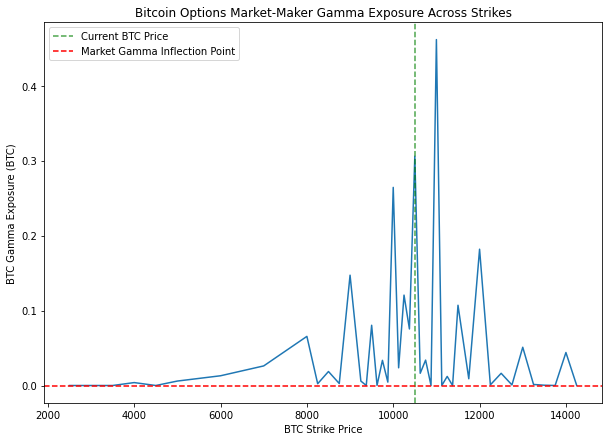

In [7]:
gex = get_gex(df, strike_values, call_data, put_data)
plt.figure(figsize=(10, 7))

# Only select subset of the strikes for better visualisation here
plt.plot(gex.strike[:-10], gex.gamma_exposure[:-10])
plt.axvline(df.underlying_price.mean(), c='g', linestyle='--', label='Current BTC Price', alpha=0.70)
plt.axhline(0, c='r', linestyle='--', label='Market Gamma Inflection Point')
plt.xlabel("BTC Strike Price")
plt.ylabel("BTC Gamma Exposure (BTC)")
plt.ticklabel_format(useOffset=False, style='plain')
plt.legend()
plt.title("Bitcoin Options Market-Maker Gamma Exposure Across Strikes");

We can see above option strikes near at-the-money (ATM) have the highest gamma exposure which is expected. It should be noted that none of the options at any strike have negative net gamma exposure which was not quite expected.

This visual is useful to analyze different gamma exposures but what we really care about is the aggregate market-maker gamma - not just individual strikes. For that reason, we sum up the gamma exposures across each individual strike and determine the total exposure.

In [8]:
print("Sum of Total Market-Maker Estimated BTC Gamma Exposure: ", gex['gamma_exposure'].sum())

Sum of Total Market-Maker Estimated BTC Gamma Exposure:  2.2091292404969685


The current estimated market-maker gamma exposure is positive. Recall from the examples above, when net gamma exposure is positive, the market will tend to have lower volatility as market-makers will delta-hedge opposite to market moves, hence dampening any price moves. This is result is somewhat encouraging because it aligns with current choppy market activity over the past week (Sept. 4th, 2020 - Sept. 12th, 2020) with BTC trading within the 10k - 11k price range.

### Next Steps

This current approach greatly simplifies the assumption of market flows by estimating the overall percentage of buyers and sellers for calls and puts respectively. If we can integrate more accurate estimations of call and put option market flow then our model's estimate for gamma positioning will greatly improve. 

Furthermore, this GEX metric is best viewed over a period of multiple days and weeks. As shown below in the original GEX paper, plotting the GEX against the percent change in the SPX can show us whether positive GEX gives us low volatility and negative GEX gives us high volatility. This can be done by collecting data and manually re-calculating the GEX for every time period to see if it works. 

<img src="figs/gex_paper_fig.png" width="500" height="400">


### Useful Resources
- https://systematicindividualinvestor.com/2020/01/23/what-do-you-mean-gamma-exposure/
- https://www.reddit.com/r/bemusedThoughtBank/comments/fr4ur3/gex_and_you_how_market_gamma_exposure_influences/
- https://squeezemetrics.com/download/white_paper.pdf
- https://www.realvision.com/market-makers-and-coronavirus-the-mechanics-of-a-market-sell-off
- https://genesisvolatility.io/